In [2]:
# problem statement : 

# identify the variables that has significance in the prediction of the car prices of Geely Auto company of China to enter the USmarket

# to create a linear model and predict the price of the car with the significant variables so that the company can decide on 
# a certain price levels for the car price . 


In [ ]:
# the steps that we follow in this exercise are : 
# 1) Reading , understanding and visualising the data
# 2)preparig the data for modelling ( trained -test split, rescaling(for ML))
# 3) Data cleaning 
# 4)trainign the model (R2, coefficient , selecting the right variable )
# 5) Residual analysis 
# 6)predictions and evaluations of the test set 


In [ ]:
# STEP1 ->READING , UNDERSTANDING AND VISUALIZING THE DATA : 
# a) Importing the necessary pacakges and libraries : 

import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import warnings 
warnings.filterwarnings("ignore")

In [3]:
# # STEP1 ->READING , UNDERSTANDING AND VISUALIZING THE DATA : 
# b)  Reading the dataframe - Car : 

import pandas as pd
geely_cars=pd.read_csv(r'C:\Users\amuly\Desktop\Geely_Car Assignment\CarPrice_Assignment (1).csv')
geely_cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
# c)  understanding the data in  the dataframe - Car :
geely_cars.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [8]:
# d) cleaning the data - as per the requirement in he question , we need to split the carname with the car name only not along with the model:
#hence we are creating a new column and replacing the required car name as specified in the problem : 

geely_cars["CarName"]=geely_cars["CarName"].str.split(" ",n=1, expand=True) 
geely_cars.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [9]:
# c)  understanding the data in  the dataframe - Car :
print(geely_cars.shape) 
print(geely_cars.dtypes)
#inference : we can see that there are no null values to address in the data : 

(205, 26)
car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object


In [10]:

geely_cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [11]:
#Inference : as you can see that the dataframe does not contain null values.
geely_cars.isnull().sum().head()

car_ID        0
symboling     0
CarName       0
fueltype      0
aspiration    0
dtype: int64

In [12]:
# Checking for Nan Values : we notice that there are no Nan valaues 
geely_cars.isna().sum().head()

car_ID        0
symboling     0
CarName       0
fueltype      0
aspiration    0
dtype: int64

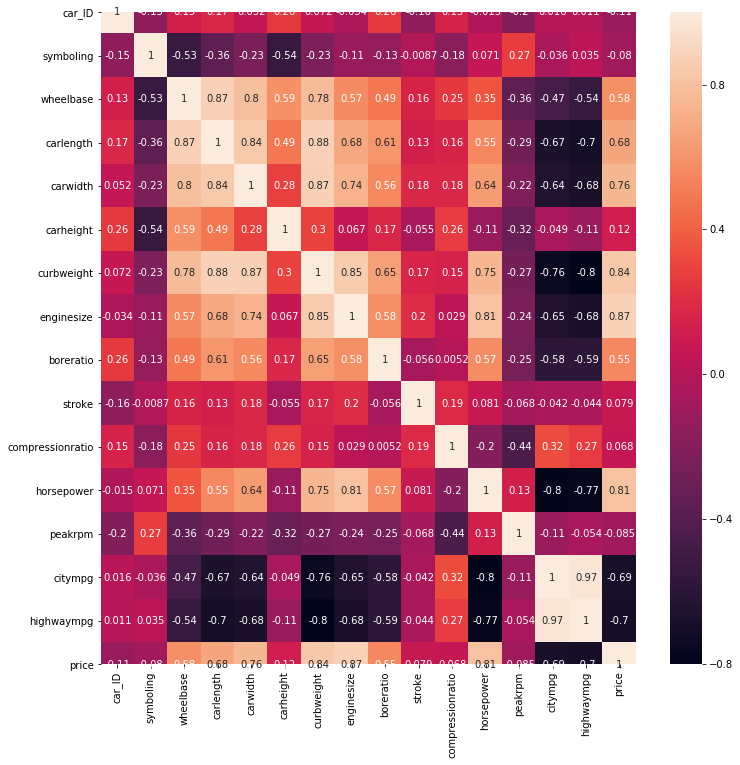

In [13]:
plt.figure(figsize=(12,12)) 
sns.heatmap(geely_cars.corr(), annot=True)

In [ ]:
#Inference : we can see that the below varaiables are stronlgy correlaated to the car price : 
# 1)Horsepower , Curbweight , enginesize, boreratio, carwidth are strongly correlated to the car price , followed by carlength and wheelbase
# 2) HighwayMpg , citympg, peakrpm , symboling are negatively correlated to car price 
# 3) On the other hand , compressorratio, carheight and stroke have a weak positive correlation to the price of the car 
# 4) Also to be noted that Wheelbase , carlength , carwidth , carheight , curbweight, enginesize and boreratio are multicolinear to each other , to a certain extent
#5) Now we need to find those independent variables to exclude from our analysis that have a high Vraiation with respect to the car price 
# 6) For this we need to find the VIF(Variance in factor) to decide that variables that has a significance on the car price 



In [15]:
#Inference : Now , lets seggregrate the continuous variables seperately as below :
geely_cars_conti=geely_cars.filter([ 'wheelbase','carlength', 'carwidth', 'carheight','curbweight', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg','highwaympg','enginesize','price'])
geely_cars_conti.head()

,wheelbase,carlength,carwidth,carheight,curbweight,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,enginesize,price
0,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,130,13495.0
1,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,130,16500.0
2,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,152,16500.0
3,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,109,13950.0
4,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,136,17450.0


In [ ]:
# # # STEP 3 : Data Visualization :

# c) lets Look at by plotting the scatter plot to find if there is any linear relationship between the variables at all with the price 


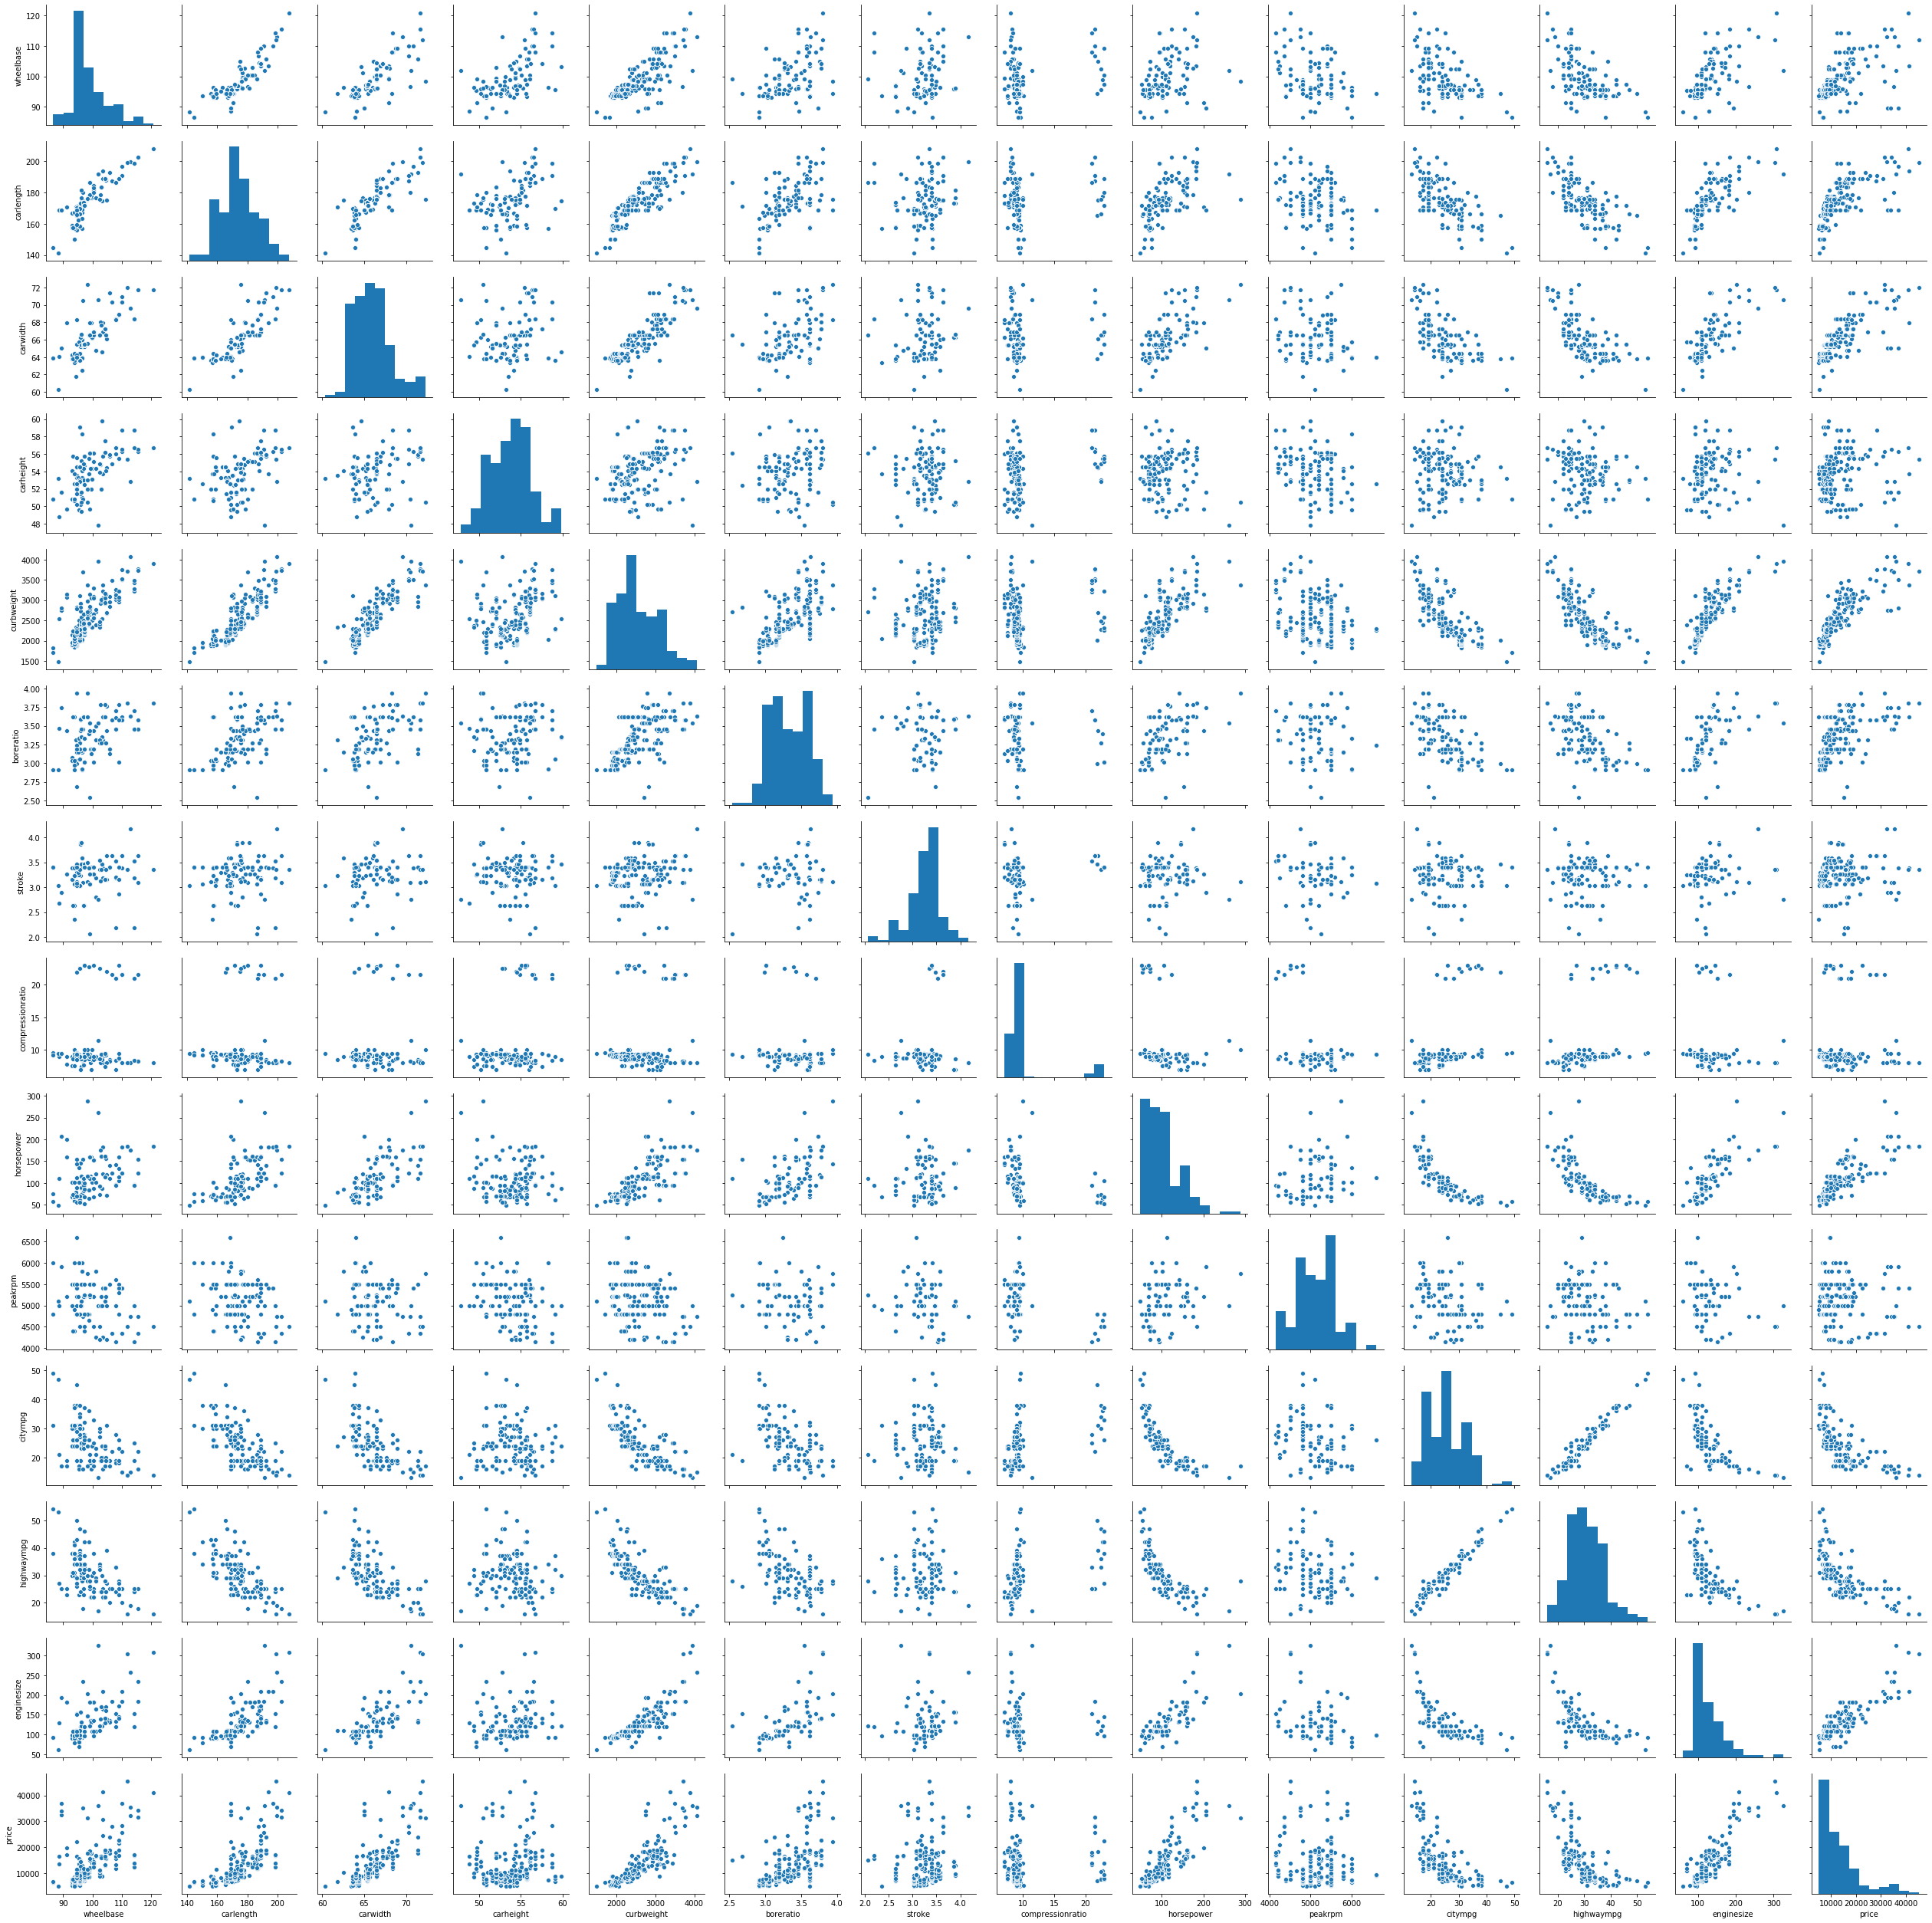

In [16]:
#Plotting the pairplot for the continuous variables to understand their relationship
sns.pairplot(geely_cars_conti)
# inference : As you can see that there exists some linear relatiohsip between the variables and the price , hence  we can continue using the linear regression model 

In [18]:
## Identifying the categorical varaibles :

geely_cars_cate=geely_cars.filter([ "symboling",'CarName', 'fueltype','aspiration','doornumber', 'carbody', 'drivewheel', 'enginelocation','enginetype', 'cylindernumber', 'fuelsystem','price']) 
geely_cars_cate.head(5)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,17450.0


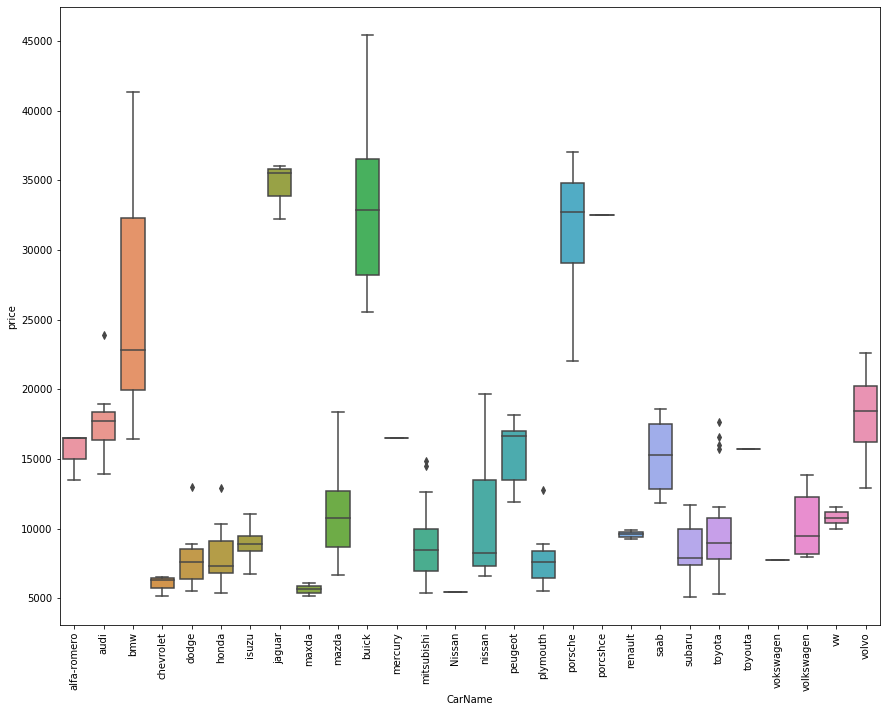

In [19]:
# # # # STEP 3 : Data Visualization :
# d) Now we shall plot the categorical varaibles vs the car price in a box plot to see how these variables influence the car price :

plt.figure(figsize=(50,25)) 
plt.subplot(2,3,1) 
plt.xticks(rotation = 90) 
sns.boxplot(x="CarName",y="price",data=geely_cars)

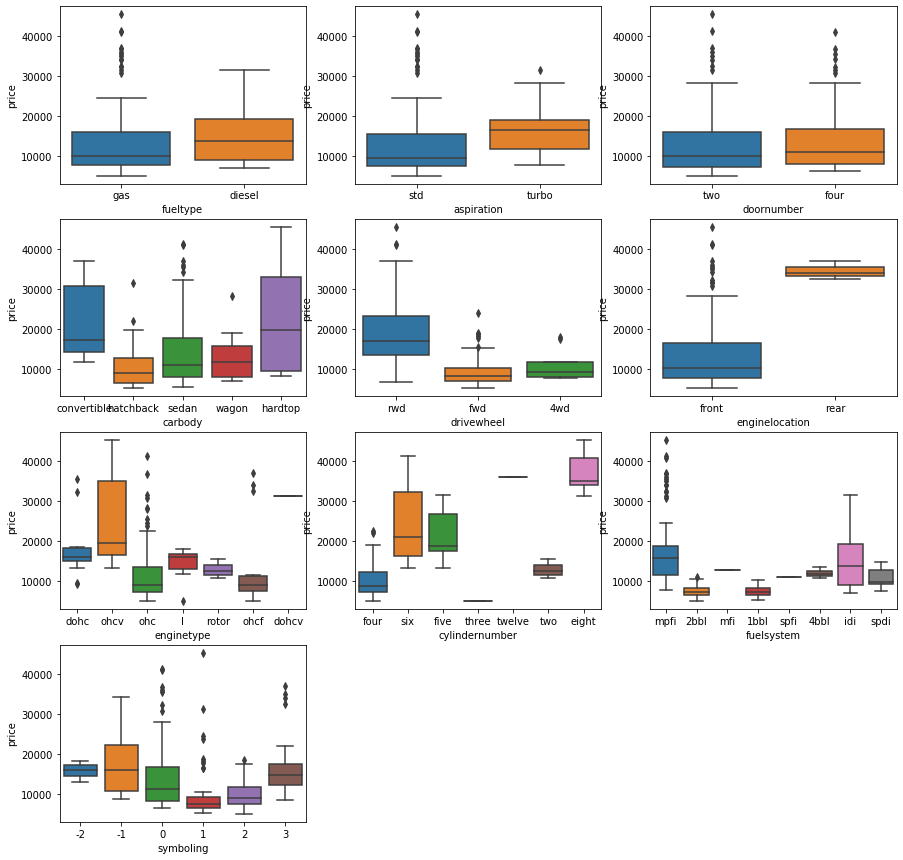

In [22]:
# # # # STEP 3 : Data Visualization :
# d) Now we shall plot the categorical varaibles vs the car price in a box plot to see how these variables influence the car price :

plt.figure(figsize=(15,15))
plt.subplot(4,3,1) 
sns.boxplot(x="fueltype",y="price",data=geely_cars)
plt.subplot(4,3,2) 
sns.boxplot(x="aspiration",y="price",data=geely_cars)
plt.subplot(4,3,3) 
sns.boxplot(x="doornumber",y="price",data=geely_cars)
plt.subplot(4,3,4) 
sns.boxplot(x="carbody",y="price",data=geely_cars)
plt.subplot(4,3,5) 
sns.boxplot(x="drivewheel",y="price",data=geely_cars)
plt.subplot(4,3,6) 
sns.boxplot(x="enginelocation",y="price",data=geely_cars)
plt.subplot(4,3,7) 
sns.boxplot(x="enginetype",y="price",data=geely_cars)
plt.subplot(4,3,8) 
sns.boxplot(x="cylindernumber",y="price",data=geely_cars)
plt.subplot(4,3,9) 
sns.boxplot(x="fuelsystem",y="price",data=geely_cars) 
plt.subplot(4,3,10) 
sns.boxplot(x="symboling",y="price",data=geely_cars)

In [ ]:
# Inference : we see that its better to limit the minimum values of horsepower , curbweight and enginesize to 0.01 and maximum values as 
# 0.96 percentile values and that of the compressionratio to 0.01 & 0.90 respectively , in order to treat the outliers within a 
# specific limit. Thus we shall restrict all the values rounded off to these limits to 0.01 , 0.96 & 0.90 percentile values respectively


In [ ]:
# d) cleaning the data - The varaiable 'Symboling' has scales related to the risky factor associate to it. Now we shall do seggregation
# of this variable based on the insurance scale : 


In [24]:
geely_cars_cate=geely_cars.filter([ "symboling",'CarName', 'fueltype','aspiration','doornumber', 'carbody', 'drivewheel', 'enginelocation','enginetype', 'cylindernumber', 'fuelsystem'])
geely_cars_cate.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [25]:
# d)Data Cleaning : Now that we had completed the handling of numerical varaiables ,lets see how we can handle the categorical varoiables :
# we have more levels relating the the categorical variables : fueltype , aspiration , doornumber and enginelocation .Hence we 
# shall create the dummy varaiables 0 & 1 and seggregrate the above into these levels .This will helo us for ease of calculation:

def dummy_conv(data): 
    return pd.get_dummies(data,drop_first=True) 
dum_vars=dummy_conv(geely_cars_cate)

In [26]:
#Verifying the dummy variables :
Dum_geely_cars=pd.concat([geely_cars,dum_vars],axis=1) 
Dum_geely_cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,0,0,0,0,0,0,0,1,0,0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,0,0,0,0,0,0,0,1,0,0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,0,0,0,0,0,0,0,1,0,0


In [27]:
# Droping 1 dummy variable and Keeping n-1 varaibles for each feature is done to avoid unnecessary columns for our analaysis and to 
# have an ease of use of the dummy variables for our calculations :

Dum_geely_cars=Dum_geely_cars.drop(["car_ID","symboling",'CarName', 'fueltype','aspiration','doornumber', 'carbody', 'drivewheel', 'enginelocation','enginetype', 'cylindernumber', 'fuelsystem'],axis=1)
Dum_geely_cars.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,1,0,0


In [28]:
#Lets verify this again :
Dum_geely_cars.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'CarName_alfa-romero',
       'CarName_audi', 'CarName_bmw', 'CarName_buick', 'CarName_chevrolet',
       'CarName_dodge', 'CarName_honda', 'CarName_isuzu', 'CarName_jaguar',
       'CarName_maxda', 'CarName_mazda', 'CarName_mercury',
       'CarName_mitsubishi', 'CarName_nissan', 'CarName_peugeot',
       'CarName_plymouth', 'CarName_porcshce', 'CarName_porsche',
       'CarName_renault', 'CarName_saab', 'CarName_subaru', 'CarName_toyota',
       'CarName_toyouta', 'CarName_vokswagen', 'CarName_volkswagen',
       'CarName_volvo', 'CarName_vw', 'fueltype_gas', 'aspiration_turbo',
       'doornumber_two', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l',
  

In [30]:
# STEP 4 : DATA ANALYSIS training  the model ( train-test-split etc R2, coefficient , selecting the right variable )
# Splitting the avilable data into training and testing set.

import sklearn 
from sklearn.model_selection import train_test_split

In [32]:
np.random.seed(0) 
Dum_geely_cars_train, Dum_geely_cars_test = train_test_split(Dum_geely_cars, train_size=0.7,test_size=0.3,random_state=100) 
Dum_geely_cars_train.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'CarName_alfa-romero',
       'CarName_audi', 'CarName_bmw', 'CarName_buick', 'CarName_chevrolet',
       'CarName_dodge', 'CarName_honda', 'CarName_isuzu', 'CarName_jaguar',
       'CarName_maxda', 'CarName_mazda', 'CarName_mercury',
       'CarName_mitsubishi', 'CarName_nissan', 'CarName_peugeot',
       'CarName_plymouth', 'CarName_porcshce', 'CarName_porsche',
       'CarName_renault', 'CarName_saab', 'CarName_subaru', 'CarName_toyota',
       'CarName_toyouta', 'CarName_vokswagen', 'CarName_volkswagen',
       'CarName_volvo', 'CarName_vw', 'fueltype_gas', 'aspiration_turbo',
       'doornumber_two', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l',
  

In [33]:
# Using MinMax scaler for feature scaling : 
# # Step 5 : Building and training the model
# inference  : 
        # scaling of the feature variables : scaling refers to following a uniform units of measuring across all the numberic variables 
# and a uniform measuring for the categorical variables. if we do not do the scaling then we may end up either in huge variance of the datapoints 
# or an erroneous coefficients . hence scaling is required for MLR where we have to deal with multiple variables .
# hence for this cars exercise , we go with the minmax scaling method . 
# inference :
      #  the scaling is done for numeric variables and not for binary variables as doing the scaling for all these variables willnot add
# value to the anALYSIS instead they will create confusion . hence scaling is done only for numeric variables 





from sklearn.preprocessing import MinMaxScaler

In [34]:
# Using Feature scaling : 
# Using MinMaxScaler to scale all the numeric variables in the same scale between 0 and 1.

scaler=MinMaxScaler()

In [35]:
# Using MinMaxScaler to scale all the numeric variables in the same scale between 0 and 1.

Vars=['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'enginesize','price']

In [36]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables : we shall bring all the numerical variables to a common scale 
# for ease of calculation & regularizing the data : 
Dum_geely_cars_train[Vars]=scaler.fit_transform(Dum_geely_cars_train[Vars])

In [37]:
Dum_geely_cars_train.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0
mean,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,0.227302,...,0.006993,0.006993,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0
std,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,0.165511,...,0.083624,0.083624,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,0.100000,0.091667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,0.500000,0.545455,0.125000,0.191667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,0.682540,0.611111,0.150000,0.283333,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0


In [38]:
Dum_geely_cars_train_1=Dum_geely_cars_train[Dum_geely_cars_train.columns[13:]]

In [39]:
Dum_geely_cars_train_2=Dum_geely_cars_train[Dum_geely_cars_train.columns[:13]]

In [40]:
Dum_geely_cars_train=pd.concat([Dum_geely_cars_train_1,Dum_geely_cars_train_2],axis=1)

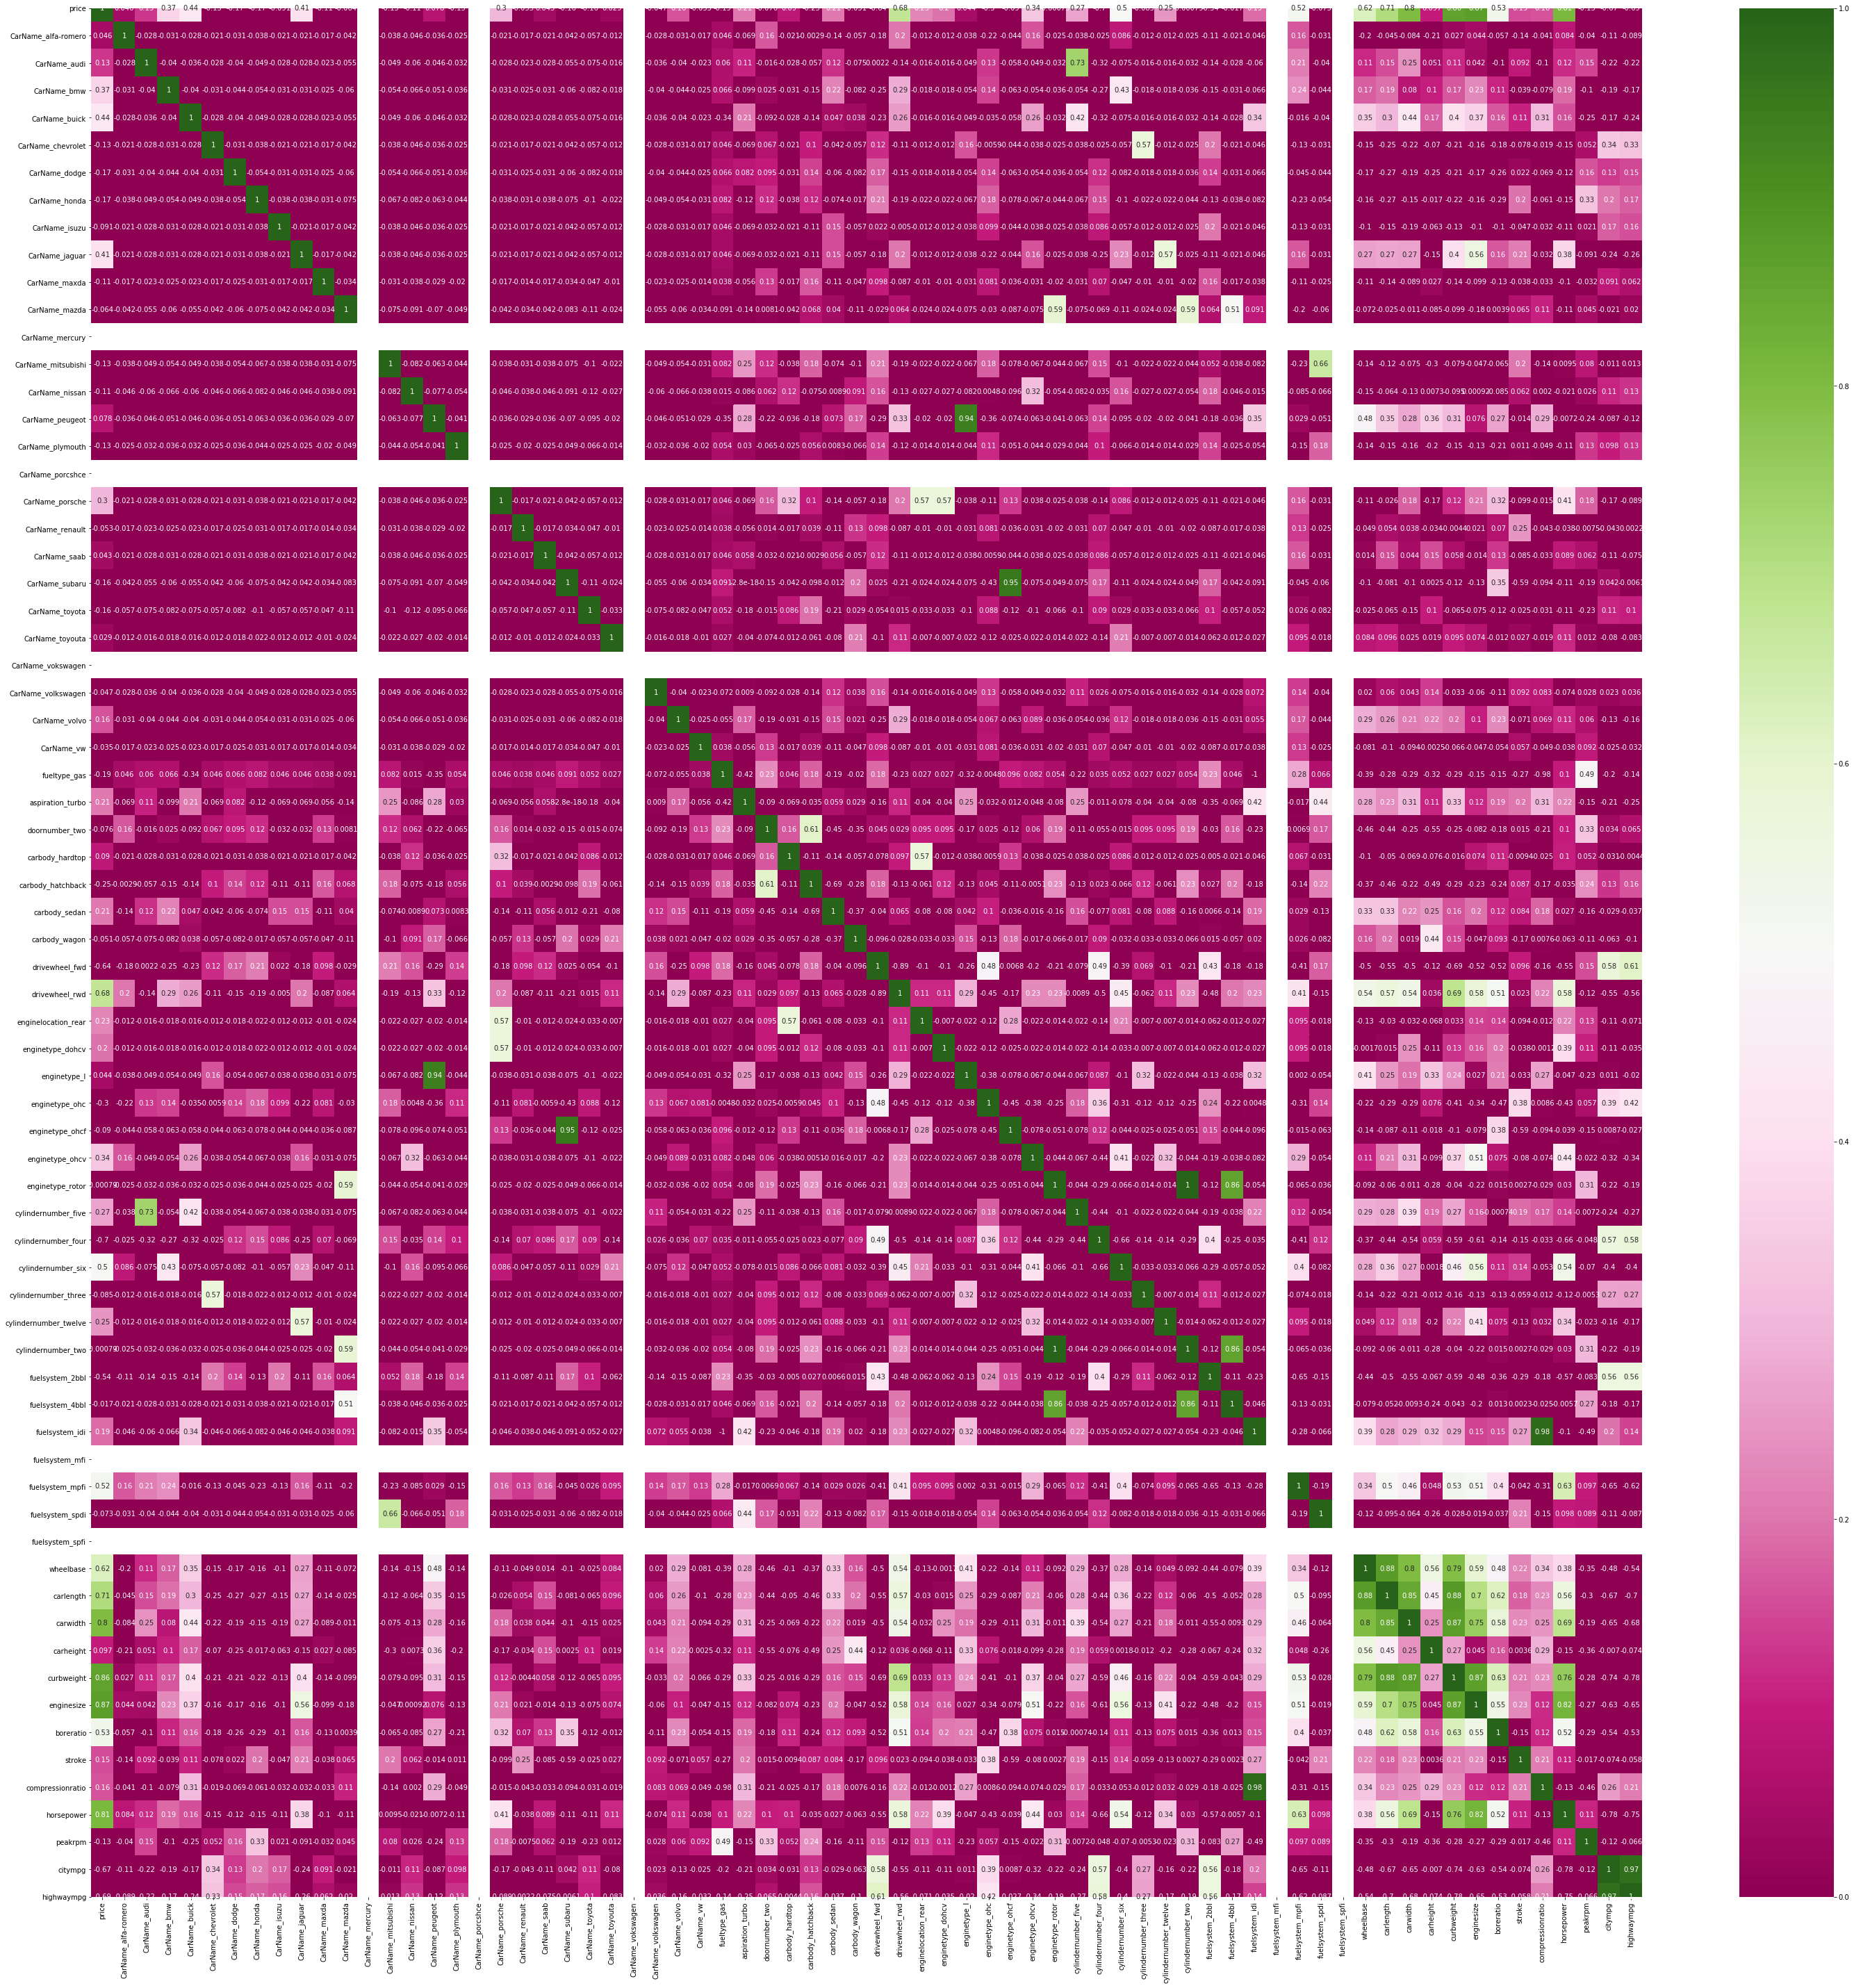

In [41]:
plt.figure(figsize=(50,50)) 
sns.heatmap(Dum_geely_cars_train.corr(), 
            vmin=0,annot=True, 
            cmap='PiYG')

In [42]:
# STEP 5 )  cONTD : -> Building a Recursive model using RFE Recursive feature elimination where we eliminate those variables 
# that have a high VIF (variance in factor) and that shows more varaiance in the database , which on the other hand impacts our analysis


from sklearn.feature_selection import RFE 
from sklearn.linear_model import LinearRegression

In [43]:
# Using the Fit transform method of train test data : 
# for that we need to declare the variables into Predictor (X) varaiables and dependent(Output) variables:

y_train = Dum_geely_cars_train.pop('price') 
X_train = Dum_geely_cars_train

In [44]:
# Create a model

lm = LinearRegression() 
lm.fit(X_train, y_train)
rfe = RFE(lm, 25) #  running RFE and selecting 15 features best describing the price of cars

In [46]:
lm = LinearRegression() 
lm.fit(X_train, y_train)
rfe = RFE(lm, 25) # running RFE 
rfe = rfe.fit(X_train, y_train)

In [47]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('CarName_alfa-romero', False, 32),
 ('CarName_audi', False, 22),
 ('CarName_bmw', True, 1),
 ('CarName_buick', False, 23),
 ('CarName_chevrolet', False, 8),
 ('CarName_dodge', False, 5),
 ('CarName_honda', False, 7),
 ('CarName_isuzu', False, 36),
 ('CarName_jaguar', False, 12),
 ('CarName_maxda', False, 35),
 ('CarName_mazda', False, 30),
 ('CarName_mercury', False, 43),
 ('CarName_mitsubishi', True, 1),
 ('CarName_nissan', False, 31),
 ('CarName_peugeot', True, 1),
 ('CarName_plymouth', False, 4),
 ('CarName_porcshce', False, 41),
 ('CarName_porsche', True, 1),
 ('CarName_renault', False, 25),
 ('CarName_saab', True, 1),
 ('CarName_subaru', True, 1),
 ('CarName_toyota', False, 39),
 ('CarName_toyouta', False, 29),
 ('CarName_vokswagen', False, 42),
 ('CarName_volkswagen', False, 38),
 ('CarName_volvo', True, 1),
 ('CarName_vw', False, 28),
 ('fueltype_gas', False, 9),
 ('aspiration_turbo', True, 1),
 ('doornumber_two', False, 34),
 ('carbody_hardtop', False, 16),
 ('carbody_hatchba

In [48]:
col = X_train.columns[rfe.support_] 
col

Index(['CarName_bmw', 'CarName_mitsubishi', 'CarName_peugeot',
       'CarName_porsche', 'CarName_saab', 'CarName_subaru', 'CarName_volvo',
       'aspiration_turbo', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohcf', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'carwidth', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'horsepower', 'peakrpm'],
      dtype='object')

In [49]:
#Below are features not selected by RFE
X_train.columns[~rfe.support_]

Index(['CarName_alfa-romero', 'CarName_audi', 'CarName_buick',
       'CarName_chevrolet', 'CarName_dodge', 'CarName_honda', 'CarName_isuzu',
       'CarName_jaguar', 'CarName_maxda', 'CarName_mazda', 'CarName_mercury',
       'CarName_nissan', 'CarName_plymouth', 'CarName_porcshce',
       'CarName_renault', 'CarName_toyota', 'CarName_toyouta',
       'CarName_vokswagen', 'CarName_volkswagen', 'CarName_vw', 'fueltype_gas',
       'doornumber_two', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_ohc', 'enginetype_ohcv', 'cylindernumber_six',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'wheelbase', 'carlength', 'carheight',
       'compressionratio', 'citympg', 'highwaympg'],
      dtype='object')

In [50]:
# Building model with statsmodel for detailed analysis and summary :

# Creating X_train dataframe with RFE selected variables

X_train_rfe=X_train[col]

In [51]:
#Adding a constant variable :
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [52]:
#fITTING THE model : 
lm = sm.OLS(y_train,X_train_rfe).fit()

In [54]:
#Lets run a summary 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     123.2
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.12e-71
Time:                        20:03:46   Log-Likelihood:                 242.95
No. Observations:                 143   AIC:                            -439.9
Df Residuals:                     120   BIC:                            -371.8
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.31

In [ ]:
# inference : Now we had created a model based on the RFE selection process with the necessary variables in place. As we can see
# that there are certain varaiables that have a high P value (more than 0.05 ) & a high Value (more than 5) weneed to remove them 

#it is observed from the above model that the Rsquared is 0.958 & adjusted Rsquared is 0.950 , which indicates that nearly 95% 
#variance among the variables  is being explained by this model . 
#Fstatic is around 123.20 indicating that the overall model seems to be better. 

In [56]:
#Inference  that can be drawn on p values and VIF  : 
# Drop the variable with high P values (greater than 0.5)
# drop the variable with high VIF (greater than 5)

# we could have : 
# high P value and high VIF : drop 
# high P-value and low VIF :  remove these such variables first 
# low P-Vlaue and high VIF : remove these after the one above 
# low p-value and low VIF : holds good.

# create a datframe that contains the names of all feature variables and their respective VIF values : code for VIF is:

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame() 
X = X_train_rfe 
vif['Features'] = X.columns 
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] 
vif['VIF'] = round(vif['VIF'], 2) 
vif = vif.sort_values(by = "VIF", ascending = False) 
vif

,Features,VIF
13,enginetype_rotor,inf
9,enginelocation_rear,inf
18,cylindernumber_two,inf
3,CarName_peugeot,inf
16,cylindernumber_three,inf
12,enginetype_ohcf,inf
6,CarName_subaru,inf
11,enginetype_l,inf
0,const,107.79
21,enginesize,39.27


In [57]:
X_train_rfe.columns

Index(['const', 'CarName_bmw', 'CarName_mitsubishi', 'CarName_peugeot',
       'CarName_porsche', 'CarName_saab', 'CarName_subaru', 'CarName_volvo',
       'aspiration_turbo', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohcf', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'carwidth', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'horsepower', 'peakrpm'],
      dtype='object')

In [67]:
X_train_new = X_train_rfe.drop(['enginetype_rotor','stroke','enginetype_ohcf','const','horsepower','enginetype_dohcv',
                               'peakrpm','enginetype_l','CarName_peugeot','curbweight','carwidth','CarName_subaru','enginelocation_rear'
                               ,'boreratio','cylindernumber_four','cylindernumber_three','cylindernumber_twelve','CarName_mitsubishi'],axis=1)

In [68]:
# Inference : As you can see that the below variables are highly corelated to each other and also the variabkles that have high  Vif  VIF
# are also calculated 
# Note that  Enginetype_rotor, enginetype_ohcf, cylindernumber_three and other variables mentioned above have high VIF and hence 

#they have an impact on multicollinerity among these varaibles in the dataframe and thus they are all eliminated . New variables are:
X_train_new.columns

Index(['CarName_bmw', 'CarName_porsche', 'CarName_saab', 'CarName_volvo',
       'aspiration_turbo', 'cylindernumber_five', 'cylindernumber_two',
       'enginesize'],
      dtype='object')

In [69]:
#Adding constant 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [70]:
lm = sm.OLS(y_train,X_train_lm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     142.8
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.01e-61
Time:                        20:32:25   Log-Likelihood:                 178.12
No. Observations:                 143   AIC:                            -338.2
Df Residuals:                     134   BIC:                            -311.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0916    

In [ ]:
#Inference : we observe that the new Rsquared is 0.895 & Adjusted r squared is 0.889 , indicating the extent of varaiance among the varaiables 
# as expressed by the new model.
#Though we can notice that the the pvalues are almost less than 0.05, but still the VIF varaiables needs to be addressed as belwo:

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,enginesize,1.59
4,aspiration_turbo,1.36
5,cylindernumber_five,1.19
0,CarName_bmw,1.14
3,CarName_volvo,1.11
1,CarName_porsche,1.09
2,CarName_saab,1.03
6,cylindernumber_two,1.00


In [ ]:
#Inference : The new Vif values looks better and the issue of Multicollinearity is addresssed as the vIF of these values is less than 5

In [72]:
X_train_new.columns

Index(['CarName_bmw', 'CarName_porsche', 'CarName_saab', 'CarName_volvo',
       'aspiration_turbo', 'cylindernumber_five', 'cylindernumber_two',
       'enginesize'],
      dtype='object')

In [73]:
X_train_lm = sm.add_constant(X_train_new)

In [74]:
# making predictions on the y varaiables - y_pred: 

y_train_pred = lm.predict(X_train_lm)

In [75]:

# Step  5) Residual analysis of the train data - Prediction of the variable y (y_train vs y_train_pred)

# one of the key assumptions of the Multiple linear regression model is that the error terms ar normally distributed or not . lets check this : 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

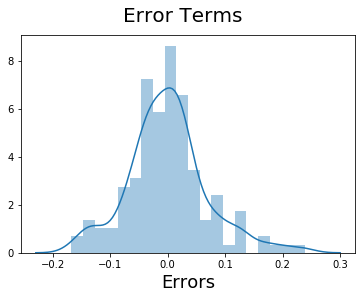

In [76]:
# Step8 : Now we got the predicted model fit for X& y varaiables , lets see how the data is spread and the relation between Xand y varaiables : 
# Model Evaluation : 

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

In [ ]:
# Inference : One of the key assumptions of the Linear Regression model is that the error terms or the residuals are normally distributed with a 
#mean centred around Zero and based on the above plot we can see that these are normally distributed for our dataframe as well

In [77]:
Vars=['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'enginesize','price']

In [79]:
Dum_geely_cars_test[Vars] = scaler.transform(Dum_geely_cars_test[Vars])

In [80]:
y_test = Dum_geely_cars_test.pop('price')
X_test = Dum_geely_cars_test
X_train_new.columns

Index(['CarName_bmw', 'CarName_porsche', 'CarName_saab', 'CarName_volvo',
       'aspiration_turbo', 'cylindernumber_five', 'cylindernumber_two',
       'enginesize'],
      dtype='object')

In [81]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)


In [82]:
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

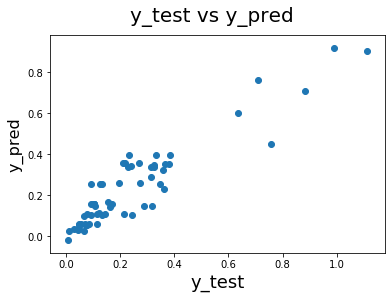

In [84]:
#Evaluating the model : The model that we had built is being evalated agaianst the y_test data and see how the r2 score of these
# models exisst . We can observe from below that they are linear in nature and hence the model tested on the tested dataframe looks good.
import statsmodels
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)           
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16) 

Text(0.5, 0, 'y_pred')

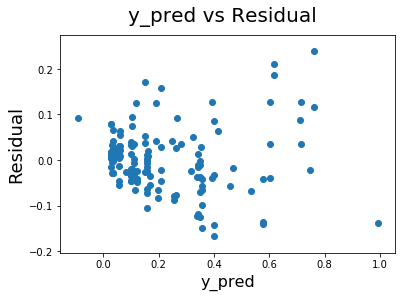

In [85]:
#Graphs related to the Predicted model vs Residuals : 
#Inference : also we can observe that there also exists a linear relationship between the predicted values and trained data as well 
Residual = (y_train - y_train_pred)
fig = plt.figure()
plt.scatter(y_train_pred,Residual )
fig.suptitle('y_pred vs Residual', fontsize=20)               
plt.ylabel('Residual', fontsize=18)                          
plt.xlabel('y_pred', fontsize=16) 

In [86]:
from sklearn.metrics import r2_score
round(r2_score(y_test, y_pred),3)

0.855

In [ ]:
#Final conclusion : 

# 1) On the whole the model seems to be a good model since it satisfies all the key assumptions and points related to Multiple Linear Regression 
#2) Addressing the variables that have a High P value and High VIF indicates that the problem of multicollinearity is reduced . 
# the Pvalues for the variables and the VIF values for the varaiables are within the limit 
# Also the residuals are all normally distributed and hence centred around the mean value of Zero . 
#Over all the model is able to explain R2sauare to 0.855 and Adj Rsquared to 0.889 with an F statstic of 142.90

#The overall Price of the car model is as follows : 
#Car_Price =CarName_bmw*0.2484+CarName_porsche*0.2580+CarName_saab*0.1081+CarName_volvo*0.1027+aspiration_turbo*0.0606+Cylindernumber_five*0.1361
#+Cylindernumber_two*0.2628+Enginesize*1.0836-Constof (-0.0916)


#Hence Geely_cars can consider the above paarameters and then estimate the price before entering the US market.